In [1]:
# Set up
import math
import pandas as pd
import numpy as np
import scipy

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
import tqdm

cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Zadanie 1. (1 punkt)
a) Napisz własny klasyfikator K-Nearest Neighbours (KNN). Zadanie można wykonać w Matlabie, <br/>
Pythonie lub innym języku programowania. W zadaniu można użyć wcześniej zaimplementowanej <br/>
funkcji liczenia odległości (na przykład z zadania 0 z listy 3). <br/>
b) Napisany klasyfikator KNN przetestuj na danych IRIS. Podziel dane losowo na dwie części: 100<br/>
wektorów danych użyj jako dane uczące do stworzenia klasyfikatora i 50 wektorów danych użyj<br/>
jako dane testowe do przetestowania stworzonego klasyfikatora. Powtórz ten eksperyment<br/>
kilkukrotnie i porównaj wyniki.<br/>
c) Przeprowadź też podobny test klasyfikatora KNN na danych Optical Recognition of Handwritten<br/>
Digits (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).<br/>
d) Zrób cross validation klasyfikatora KNN na obu zestawach danych: podziel dane na 10 części,<br/>
kolejno bierz jedną z nich, traktuj ją jako dane testowe, a pozostałe 9 części jako dane uczące,<br/>
stwórz klasyfikator na danych uczących i przetestuj na danych testowych, odnotuj liczbę błędów,<br/>
powtórz obliczenia dla kolejnych części danych, policz całkowity błąd klasyfikatora sumując<br/>
odnotowane liczby błędów. <br/>

In [4]:
def KNN(train_X, train_Y, test_X, ks):
    """
    Compute predictions k
    Args:
        train_X: array of shape Ntrain x D
        train_Y: array of shape Ntrain
        test_X: array of shape Ntest x D
        ks: list of integers
    Returns:
        preds: dict of predictions for all k in ks
    """
    # Cats data to float32
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)

    # Efficient distance matrix computation
    # https://medium.com/@souravdey/l2-distance-matrix-vectorization-trick-26aa3247ac6c   
    dists = -2 * np.dot(train_X, test_X.T) + np.sum(test_X**2, axis=1) + np.sum(train_X**2, axis=1)[:, np.newaxis]
    
    # find closest trainig points
    closest = np.argsort(dists, axis=0)
    
    # closest trainig points - > closest trainig targets
    targets = train_Y[closest]
  
    # Alloc space for results
    preds = {}
    
    for k in ks:
        predictions = scipy.stats.mode(targets[:k])[0] #take k closest targets
        predictions = predictions.ravel()
        preds[k] = predictions
  
    return preds

# 1. Iris

In [2]:
# reading data
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
59,5.2,2.7,3.9,1.4,1.0
136,6.3,3.4,5.6,2.4,2.0
124,6.7,3.3,5.7,2.1,2.0
88,5.6,3.0,4.1,1.3,1.0
15,5.7,4.4,1.5,0.4,0.0


In [60]:
# divide data
train, test = train_test_split(iris_df, test_size=0.3333)

train_iris_x = np.array(train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
train_iris_y = np.array(train['target'])

test_iris_x = np.array(test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
test_iris_y = np.array(test['target'])

In [62]:
# run KNN
ks = np.arange(1,21,2)
predictions = KNN(train_iris_x, train_iris_y, test_iris_x, ks)

for k, preds in predictions.items():
    result = list(preds == test_iris_y)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 94.0%
Score for k = 3 is: 96.0%
Score for k = 5 is: 98.0%
Score for k = 7 is: 96.0%
Score for k = 9 is: 96.0%
Score for k = 11 is: 94.0%
Score for k = 13 is: 92.0%
Score for k = 15 is: 90.0%
Score for k = 17 is: 92.0%
Score for k = 19 is: 94.0%


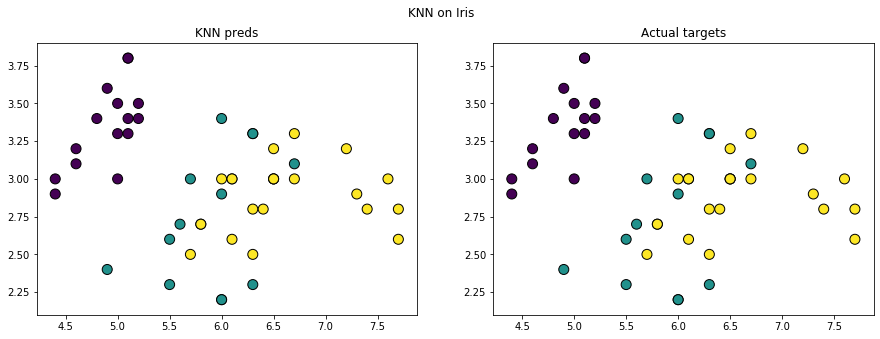

In [66]:
best_k = 5
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle('KNN on Iris')

axes[0].set_title('KNN preds')
axes[1].set_title('Actual targets')

axes[0].scatter(test_iris_x[:, 0], test_iris_x[:, 1], s=100,
                c=predictions[best_k], edgecolors='black')

axes[1].scatter(test_iris_x[:, 0], test_iris_x[:, 1], s=100,
                c=test_iris_y, edgecolors='black')

# 2. Optical Recognition of Handwritten Digits

In [54]:
# reading data
train_digits = np.array(pd.read_csv('data/optdigits.tra', header=None))
test_digits = np.array(pd.read_csv('data/optdigits.tes', header=None))

X_train = train_digits[:,:-1]
Y_train = train_digits[:,-1]
X_test = test_digits[:,:-1]
Y_test= test_digits[:,-1]

In [72]:
X_train.shape

(3823, 64)

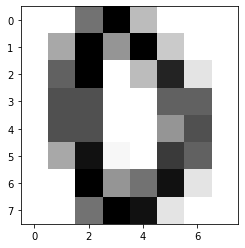

In [55]:
# sample from ds 
plt.imshow(X_train[1].reshape(8, 8), cmap='Greys')

In [67]:
ks = np.arange(1,21,2)
predictions = KNN(X_train, Y_train, X_test, ks)

for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 97.9966611018364%
Score for k = 3 is: 97.8297161936561%
Score for k = 5 is: 97.88536449638286%
Score for k = 7 is: 97.66277128547578%
Score for k = 9 is: 97.77406789092933%
Score for k = 11 is: 97.94101279910963%
Score for k = 13 is: 97.38452977184195%
Score for k = 15 is: 97.27323316638842%
Score for k = 17 is: 97.21758486366166%
Score for k = 19 is: 97.10628825820812%


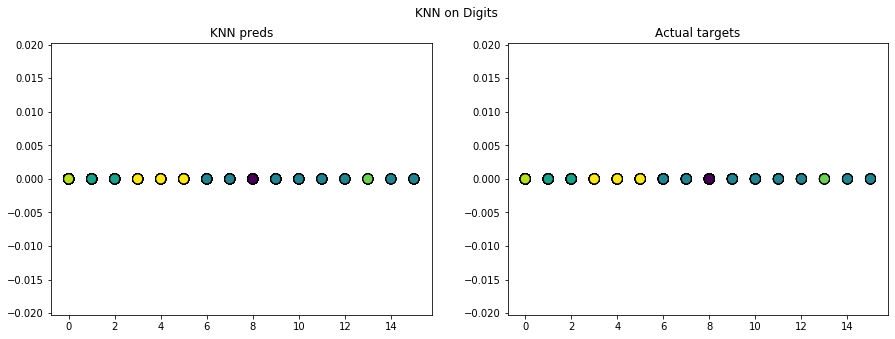

In [75]:
best_k = 11
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle('KNN on Digits')

axes[0].set_title('KNN preds')
axes[1].set_title('Actual targets')

axes[0].scatter(X_test[:, 30], X_test[:, 32], s=100,
                c=predictions[best_k], edgecolors='black')

axes[1].scatter(X_test[:, 30], X_test[:, 32], s=100,
                c=Y_test, edgecolors='black')

# 3. Cross validation

In [104]:
def cross_validation(X, Y, no=10):
    err_sum = 0
    indices = np.random.uniform(0, no, len(X)).astype(int)
    for i in range(no):
        print(f'Test on {i}')
        x_train = X[indices != i]
        y_train = Y[indices != i]
        x_test = X[indices == i]
        y_test = Y[indices == i]
        
        ks = np.arange(1,21,2)
        predictions = KNN(x_train, y_train, x_test, ks)
        
        best_k, best_score = 0, 0
        for k, preds in predictions.items():
            result = list(preds == y_test)
            result_cnt = result.count(True) / len(result) * 100
            if result_cnt > best_score:
                best_score = result_cnt
                best_k = k
        err_sum += best_score
        print(f'Best k: {best_k} -> score: {best_score}\n')
        
    print(f'Final error: {err_sum / no}')
        

In [105]:
cross_validation(train_iris_x, train_iris_y)

Test on 0
Best k: 5 -> score: 100.0

Test on 1
Best k: 1 -> score: 100.0

Test on 2
Best k: 1 -> score: 85.71428571428571

Test on 3
Best k: 9 -> score: 90.0

Test on 4
Best k: 1 -> score: 100.0

Test on 5
Best k: 1 -> score: 100.0

Test on 6
Best k: 1 -> score: 100.0

Test on 7
Best k: 1 -> score: 100.0

Test on 8
Best k: 1 -> score: 100.0

Test on 9
Best k: 1 -> score: 100.0

Final error: 97.57142857142858


In [106]:
cross_validation(X_train, Y_train)

Test on 0
Best k: 5 -> score: 98.88888888888889

Test on 1
Best k: 3 -> score: 99.45504087193461

Test on 2
Best k: 3 -> score: 99.75124378109453

Test on 3
Best k: 1 -> score: 98.73417721518987

Test on 4
Best k: 5 -> score: 98.08219178082192

Test on 5
Best k: 3 -> score: 98.49624060150376

Test on 6
Best k: 1 -> score: 98.4375

Test on 7
Best k: 11 -> score: 98.69109947643979

Test on 8
Best k: 5 -> score: 98.85714285714286

Test on 9
Best k: 1 -> score: 98.80668257756562

Final error: 98.82002080505819


# Plot the Decision boundary for Iris

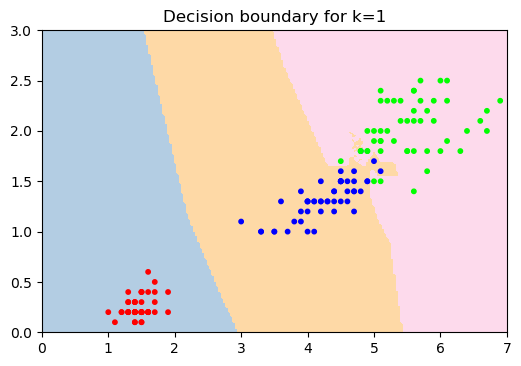

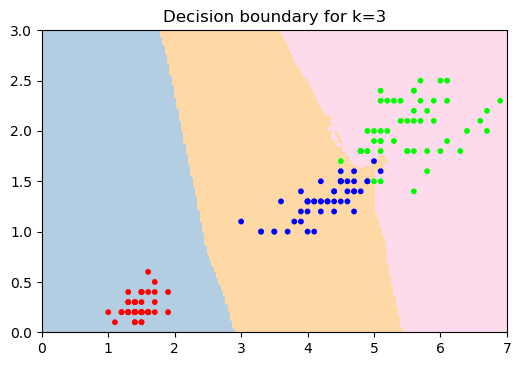

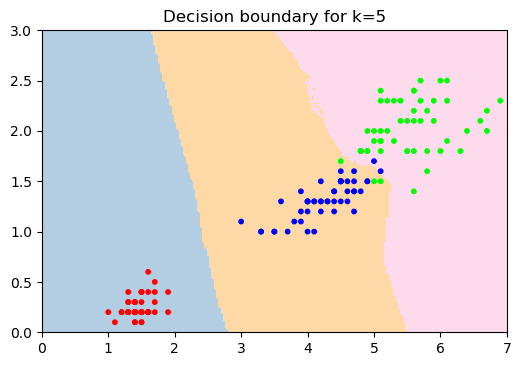

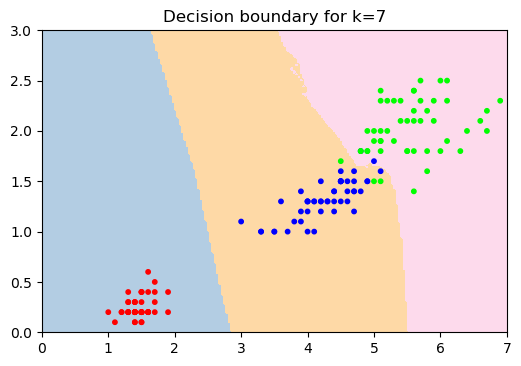

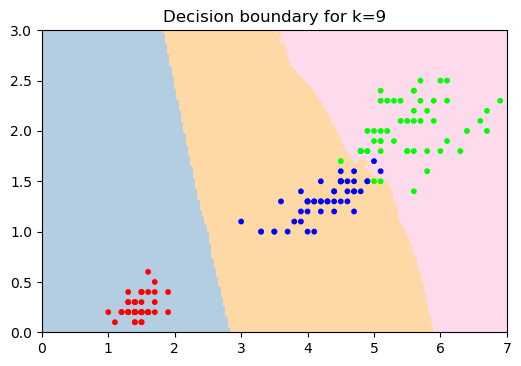

In [9]:
iris_x = np.array(iris_df[['petal length (cm)', 'petal width (cm)']])
iris_y = np.array(iris_df['target'])

X_space = np.linspace(0,7,200)
Y_space = np.linspace(0,3,200)
mesh_x, mesh_y = np.meshgrid(X_space, Y_space)

# use np.unique with suitable options to map the class names to numbers
target_names, iris_y_ids = np.unique(iris_y, return_inverse=True)
# print(target_names, iris_y_ids)

mesh_data = np.hstack([mesh_x.reshape(-1, 1), mesh_y.reshape(-1, 1)])

preds = KNN(iris_x, iris_y_ids, mesh_data, ks)
for k, preds_k in preds.items():
    plt.figure(dpi=100)
    plt.title(f"Decision boundary for k={k}")
    plt.contourf(mesh_x, mesh_y, preds_k.reshape(200,200), levels=2, cmap='Pastel1')
    plt.scatter(iris_x[:,0], iris_x[:,1], c=iris_y_ids, s=10, cmap=cmap_bold)
      